In [ ]:
#Author - Rizlan
#20223256/w1987516

In [ ]:
!pip install pandas

# **Import Required Libraries**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import RocCurveDisplay



#To setup Decision tree Regresser
from sklearn.tree import DecisionTreeRegressor


#For DT metrices
from sklearn import metrics
from sklearn import tree
from matplotlib import pyplot as plt



# **probability-based voting ensemble classifier**

In [ ]:
#Loading the CSV
df = pd.read_csv('/content/drive/MyDrive/ML-CW/Mortality_Status.csv')

In [ ]:
#displaying first five rows
df.head()

,Age,Sex,T_Stage,N_Stage,6th_Stage,Differentiated,Grade,A_Stage,Tumor_Size,Estrogen_Status,Progesterone_Status,Regional_Node_Examined,Reginol_Node_Positive,Mortality_Status
0,68,0,0,0,0,2,3,0,4,1,1,24,1,1
1,50,0,1,1,2,1,2,0,35,1,1,14,5,1
2,58,0,2,2,4,1,2,0,63,1,1,14,7,1
3,58,0,0,0,0,2,3,0,18,1,1,2,1,1
4,47,0,1,0,1,2,3,0,41,1,1,3,1,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3254 entries, 0 to 3253
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Age                     3254 non-null   int64
 1   Sex                     3254 non-null   int64
 2   T_Stage                 3254 non-null   int64
 3   N_Stage                 3254 non-null   int64
 4   6th_Stage               3254 non-null   int64
 5   Differentiated          3254 non-null   int64
 6   Grade                   3254 non-null   int64
 7   A_Stage                 3254 non-null   int64
 8   Tumor_Size              3254 non-null   int64
 9   Estrogen_Status         3254 non-null   int64
 10  Progesterone_Status     3254 non-null   int64
 11  Regional_Node_Examined  3254 non-null   int64
 12  Reginol_Node_Positive   3254 non-null   int64
 13  Mortality_Status        3254 non-null   int64
dtypes: int64(14)
memory usage: 356.0 KB


In [ ]:
feature_columns = ['Age','Sex','T_Stage','N_Stage','6th_Stage','Differentiated','Grade','A_Stage','Tumor_Size','Estrogen_Status','Progesterone_Status','Regional_Node_Examined','Reginol_Node_Positive']
X = df[feature_columns] # Features
y = df['Mortality_Status'] #Targeted Features

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42,stratify=y)
#Feature List
print(X.columns.tolist())
print('WholeData',df.shape)

#Shape Of Train Data
print('TrainData',X_train.shape)
#Shape Of Test Data
print('TestData',X_test.shape)


['Age', 'Sex', 'T_Stage', 'N_Stage', '6th_Stage', 'Differentiated', 'Grade', 'A_Stage', 'Tumor_Size', 'Estrogen_Status', 'Progesterone_Status', 'Regional_Node_Examined', 'Reginol_Node_Positive']
WholeData (3254, 14)
TrainData (2277, 13)
TestData (977, 13)


In [ ]:
SS = StandardScaler()
X_train = SS.fit_transform(X_train)
X_test = SS.transform(X_test)

## **Initiating the Ensamble Learner**

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier

base_learners=[('GaussianNB',GaussianNB(priors=[0.5,0.5])), ('LogisticRegression',
LogisticRegression(class_weight='balanced'))]

ensemble_learner = VotingClassifier(base_learners, voting='soft')

**Training the model**

In [ ]:
ensemble_learner.fit(X_train, y_train)

VotingClassifier(estimators=[('GaussianNB', GaussianNB(priors=[0.5, 0.5])),
                             ('LogisticRegression',
                              LogisticRegression(class_weight='balanced'))],
                 voting='soft')

**Testing the Model**

In [ ]:
y_pred_ensemble_learner = ensemble_learner.predict(X_test)

**Accuracy Score**

In [ ]:
ensemble_learner_accuracy = accuracy_score(y_test, y_pred_ensemble_learner)
print ("The voting ensemble classifier accuracy is: ", ensemble_learner_accuracy)

The voting ensemble classifier accuracy is:  0.7154554759467758


**Confustion Metrix**

Text(0.5, 1.0, 'Ensemble Learner Confusion Matrix')

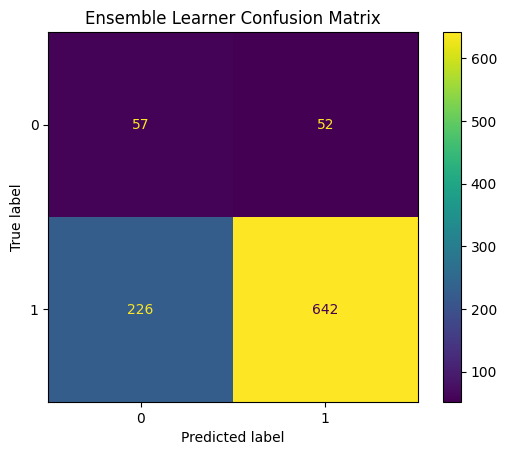

In [ ]:
ensemble_learner_cm_test = confusion_matrix(y_test, y_pred_ensemble_learner, labels=ensemble_learner.classes_)
ensemble_learner_disp = ConfusionMatrixDisplay(ensemble_learner_cm_test,display_labels=ensemble_learner.classes_)
ensemble_learner_disp.plot()
ensemble_learner_disp.ax_.set_title("Ensemble Learner Confusion Matrix")

**Classification Report**

In [ ]:
print("Ensemble Learner Classification Report \n", classification_report(y_test, y_pred_ensemble_learner))

Ensemble Learner Classification Report 
               precision    recall  f1-score   support

           0       0.20      0.52      0.29       109
           1       0.93      0.74      0.82       868

    accuracy                           0.72       977
   macro avg       0.56      0.63      0.56       977
weighted avg       0.84      0.72      0.76       977



ROC Curve

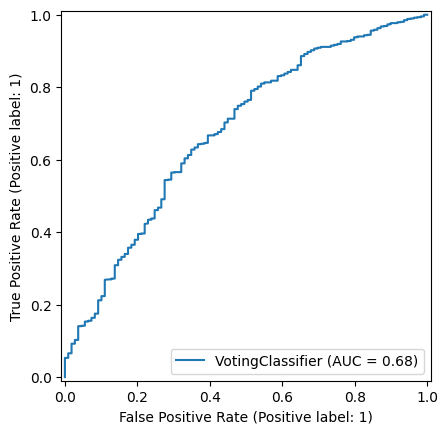

In [ ]:
ensemble_learner = RocCurveDisplay.from_estimator(ensemble_learner, X_test, y_test)

# **Data Load For Regresser**

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/ML-CW/Survival_Months.csv")


In [ ]:
df.head()

,index,Age,Sex,T_Stage,N_Stage,6th_Stage,Differentiated,Grade,A_Stage,Tumor_Size,Estrogen_Status,Progesterone_Status,Regional_Node_Examined,Reginol_Node_Positive,Survival_Months,Mortality_Status
0,7,40,0,1,0,1,1,2,0,30,1,1,9,1,14,0
1,10,68,0,0,0,0,1,2,0,13,1,1,9,1,64,0
2,46,42,0,0,2,4,1,2,0,9,0,0,15,2,39,0
3,64,67,0,0,0,0,1,2,0,13,1,1,16,3,60,0
4,90,53,0,2,0,2,2,3,0,60,1,1,8,1,91,0


In [ ]:
#Retriveing the Shape of the Dataset
print( "Shape of the Dataset")
df.shape

Shape of the Dataset


(362, 16)

**Removing Survival Status from the list**

In [ ]:
df.drop(['Mortality_Status'], axis=1, inplace=True)
list(df.columns)

['index',
 'Age',
 'Sex',
 'T_Stage',
 'N_Stage',
 '6th_Stage',
 'Differentiated',
 'Grade',
 'A_Stage',
 'Tumor_Size',
 'Estrogen_Status',
 'Progesterone_Status',
 'Regional_Node_Examined',
 'Reginol_Node_Positive',
 'Survival_Months']

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 362 entries, 0 to 361
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   index                   362 non-null    int64
 1   Age                     362 non-null    int64
 2   Sex                     362 non-null    int64
 3   T_Stage                 362 non-null    int64
 4   N_Stage                 362 non-null    int64
 5   6th_Stage               362 non-null    int64
 6   Differentiated          362 non-null    int64
 7   Grade                   362 non-null    int64
 8   A_Stage                 362 non-null    int64
 9   Tumor_Size              362 non-null    int64
 10  Estrogen_Status         362 non-null    int64
 11  Progesterone_Status     362 non-null    int64
 12  Regional_Node_Examined  362 non-null    int64
 13  Reginol_Node_Positive   362 non-null    int64
 14  Survival_Months         362 non-null    int64
dtypes: int64(15)
memory usa

In [ ]:
list(df.columns)

['index',
 'Age',
 'Sex',
 'T_Stage',
 'N_Stage',
 '6th_Stage',
 'Differentiated',
 'Grade',
 'A_Stage',
 'Tumor_Size',
 'Estrogen_Status',
 'Progesterone_Status',
 'Regional_Node_Examined',
 'Reginol_Node_Positive',
 'Survival_Months']

In [ ]:
df.isnull().sum()

,0
index,0
Age,0
Sex,0
T_Stage,0
N_Stage,0
6th_Stage,0
Differentiated,0
Grade,0
A_Stage,0
Tumor_Size,0


# **Data Pre-Processing (Preparation)**

we have to take the Feature Columns and targeted feature

In [ ]:
feature_columns= ['Age','Sex','T_Stage','N_Stage','6th_Stage','Differentiated','Grade','A_Stage','Tumor_Size','Estrogen_Status',
                   'Progesterone_Status','Regional_Node_Examined','Reginol_Node_Positive']
X = df[feature_columns] # Features
y = df['Survival_Months'] #Targeted Features


## **Splitting Data into Train and Test**

stratify=y is not applied bcz its dont have multiple Classes

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)
print('WholeData',df.shape)
print('TrainData',X_train.shape)
print('TestData',X_test.shape)


WholeData (362, 15)
TrainData (253, 13)
TestData (109, 13)


In [ ]:
X_train_ScaledData = X_train
X_test_ScaledData = X_test

In [ ]:
scaled_df = pd.DataFrame(X_train_ScaledData, columns=feature_columns)
# View first few rows
print(scaled_df.head())


     Age  Sex  T_Stage  N_Stage  6th_Stage  Differentiated  Grade  A_Stage  \
177   51    0        1        1          2               1      2        0   
266   40    0        2        0          2               1      2        0   
219   62    0        1        1          2               2      3        0   
282   61    0        1        0          1               2      3        0   
19    61    0        1        1          2               2      3        0   

     Tumor_Size  Estrogen_Status  Progesterone_Status  Regional_Node_Examined  \
177          35                1                    1                      13   
266          60                1                    1                      10   
219          40                1                    1                      12   
282          21                1                    1                       8   
19           50                1                    1                      11   

     Reginol_Node_Positive  
177            

# **Modeling With Decission Tree**

In [ ]:
BCSD_Full_DT_model = DecisionTreeRegressor(random_state=41)
# BCSD_Full_DT_model = DecisionTreeRegressor(random_state=42)

In [ ]:
#Fitting the data for Decision tree
BCSD_Full_DT_model.fit(X_train_ScaledData, y_train)

DecisionTreeRegressor(random_state=41)

## **Predicting The Test Data For Full Grown Tree**

In [ ]:
y_pred_fullTree = BCSD_Full_DT_model.predict(X_test_ScaledData)

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_fullTree))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_fullTree))
print('R2:', metrics.r2_score(y_test, y_pred_fullTree))

MAE: 27.40366972477064
MSE: 1149.1284403669724
R2: -1.2004687247662744


## **Ploting the Decistion Tree Visually**

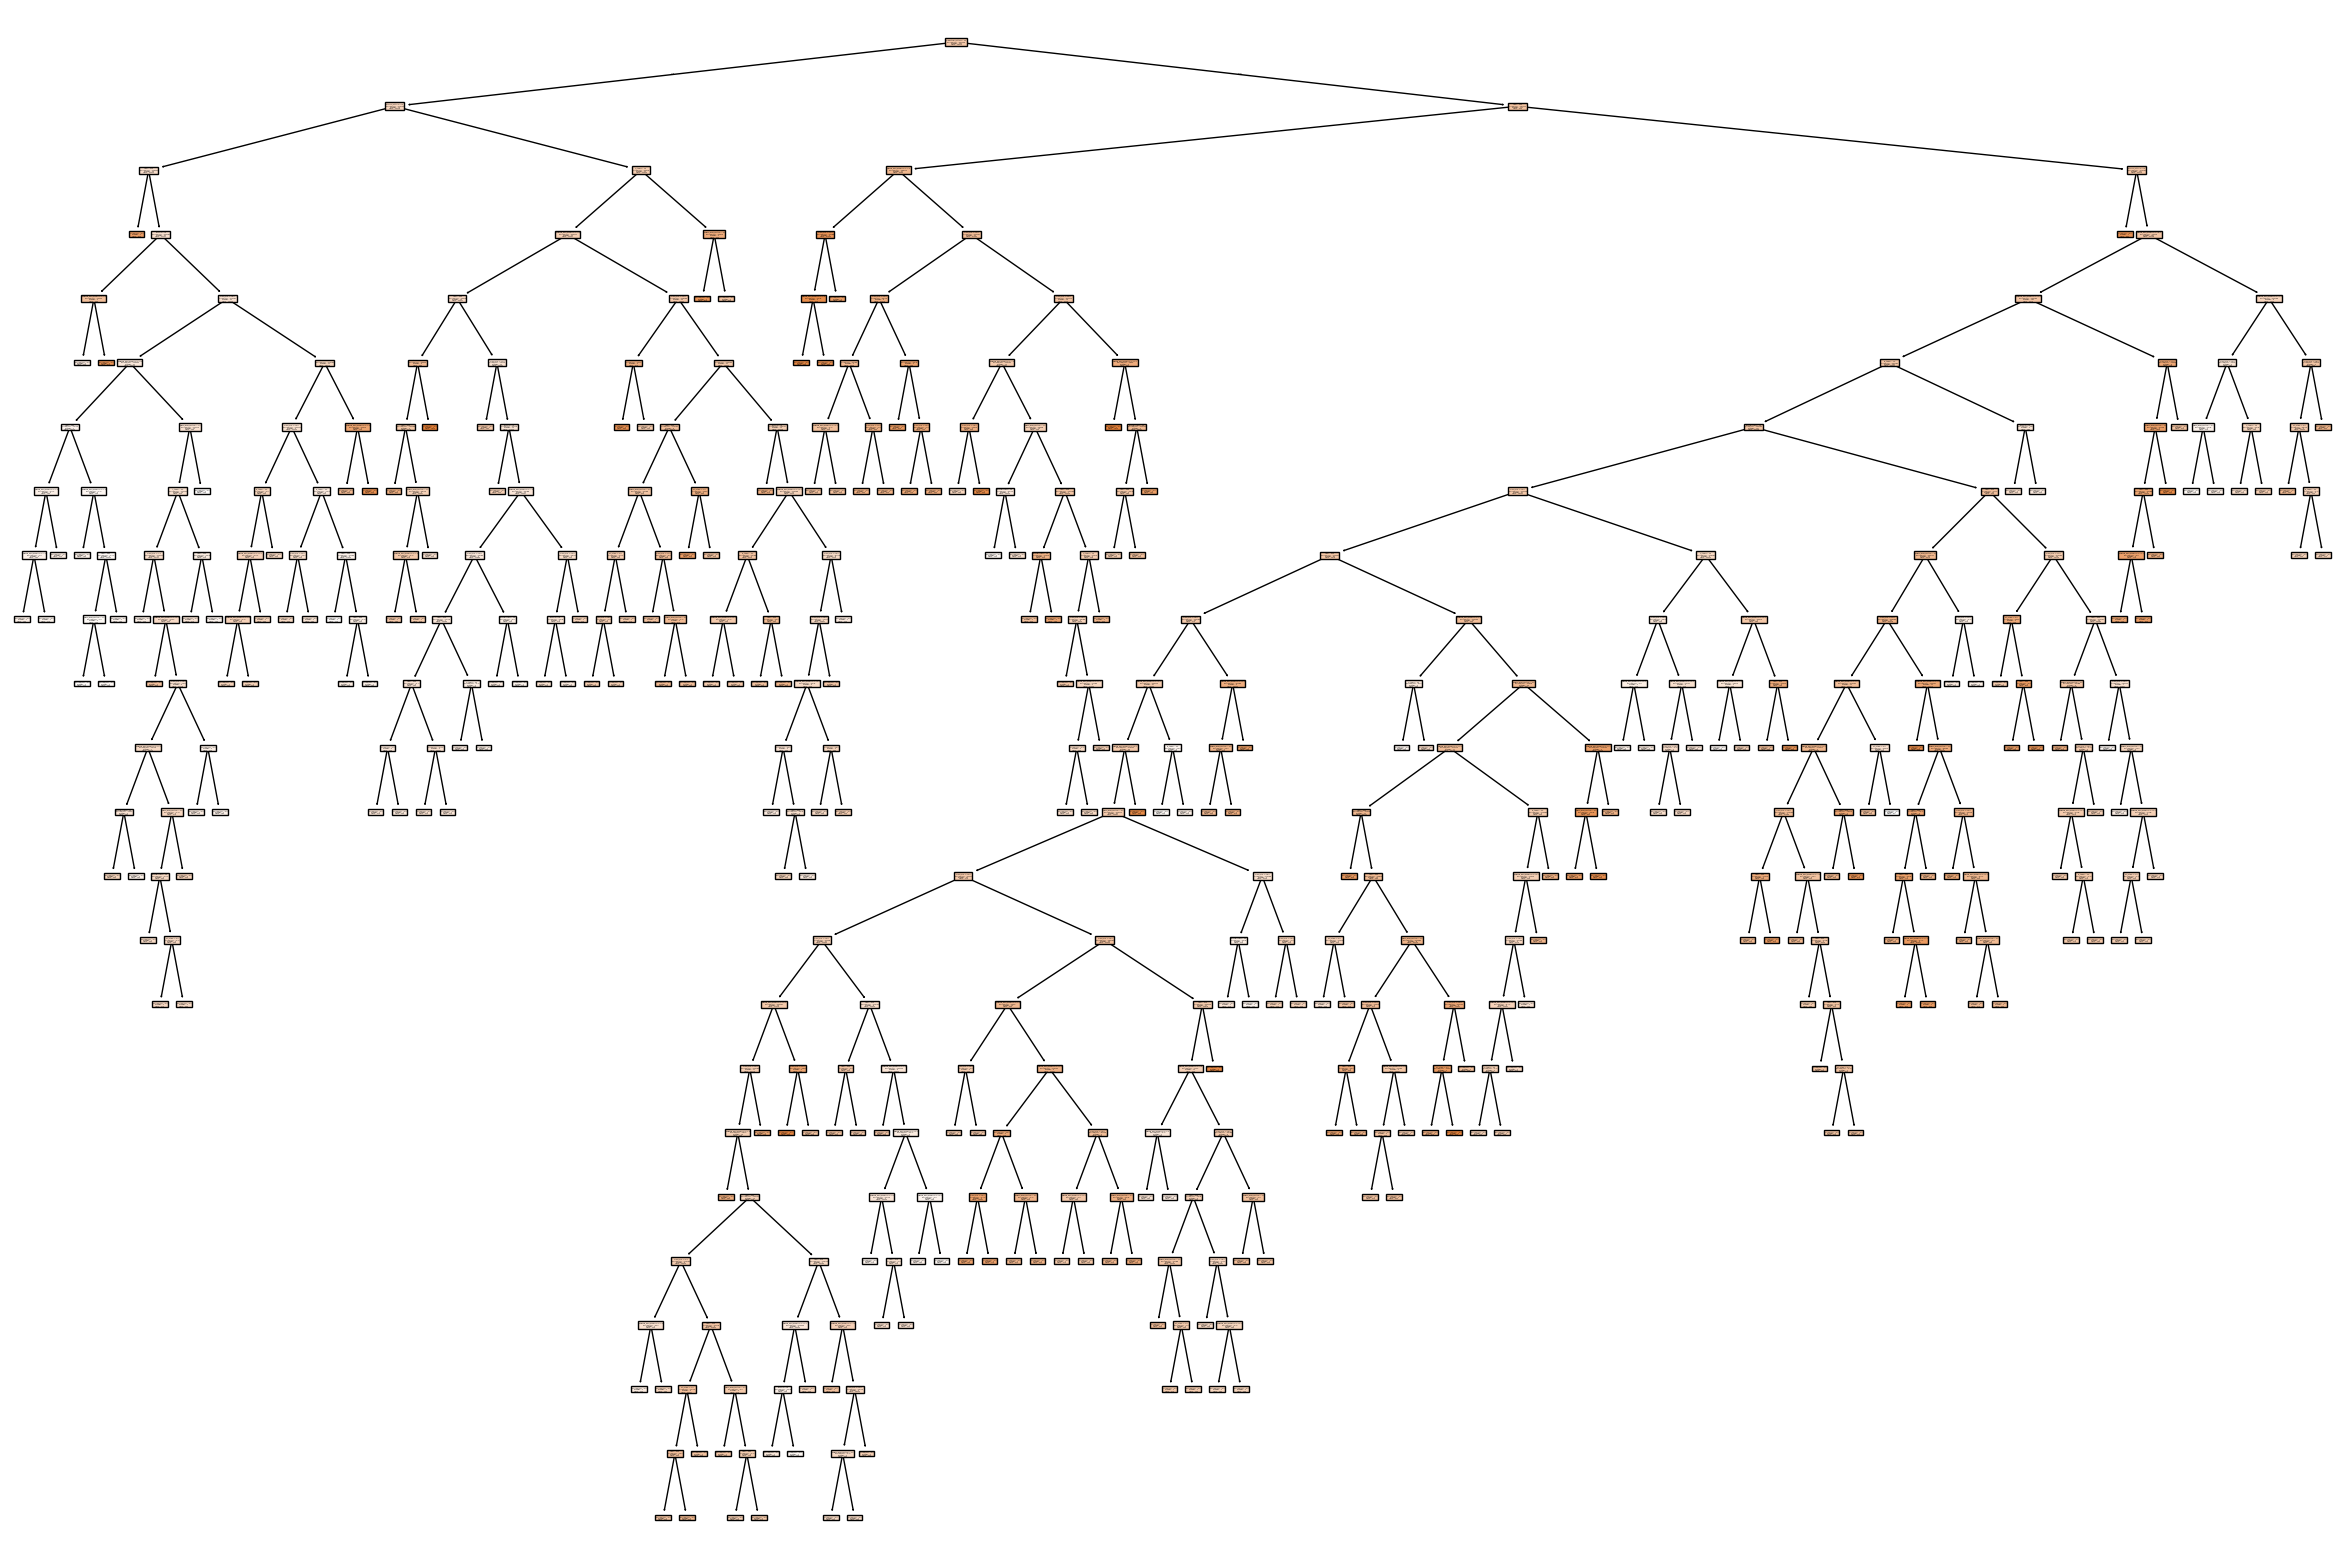

In [ ]:
Tree_figure_fullTree = plt.figure(figsize=(30,20))
DT_Graph = tree.plot_tree(BCSD_Full_DT_model, feature_names=list(X_train.columns), filled=True)

In [ ]:
Tree_figure_fullTree.savefig("/content/drive/MyDrive/ML-CW/Fully_grown_decistion_tree.svg")

# **Modeling With PrunedTree**

## **Hyper Parameter Tuning Using Gridsearch CV**

In [ ]:
param_grid = {
    'criterion' : ['squared_error'],
    'splitter':['random', 'best'],
    'max_depth': [4],
    'min_samples_split': list(range(2, 10)),
    'min_samples_leaf': list(range(1, 6)),
}

Pruned_Decsion_Tree = DecisionTreeRegressor(random_state=41)

GridSerched_Pruned_Decsion_Tree = GridSearchCV(
    estimator=Pruned_Decsion_Tree,
    param_grid=param_grid,
    scoring='r2',
    cv=5,  # 5-fold cross-validation

)


GridSerched_Pruned_Decsion_Tree.fit(X_train_ScaledData, y_train)


print("Best Parameters:", GridSerched_Pruned_Decsion_Tree.best_params_)
# print("Best MAE (on validation):", -grid_search.best_score_)  # Neg MAE is used internally


Best Parameters: {'criterion': 'squared_error', 'max_depth': 4, 'min_samples_leaf': 5, 'min_samples_split': 2, 'splitter': 'random'}


In [ ]:
# Predict on the test set
y_pred_PrunedTree = GridSerched_Pruned_Decsion_Tree.predict(X_test_ScaledData)


print("Perfomance")

print('MAE:', metrics.mean_absolute_error(y_test, y_pred_PrunedTree))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_PrunedTree))
print('R2:', metrics.r2_score(y_test, y_pred_PrunedTree))

Perfomance
MAE: 18.81866259685912
MSE: 559.7407498930079
R2: -0.0718488646259996


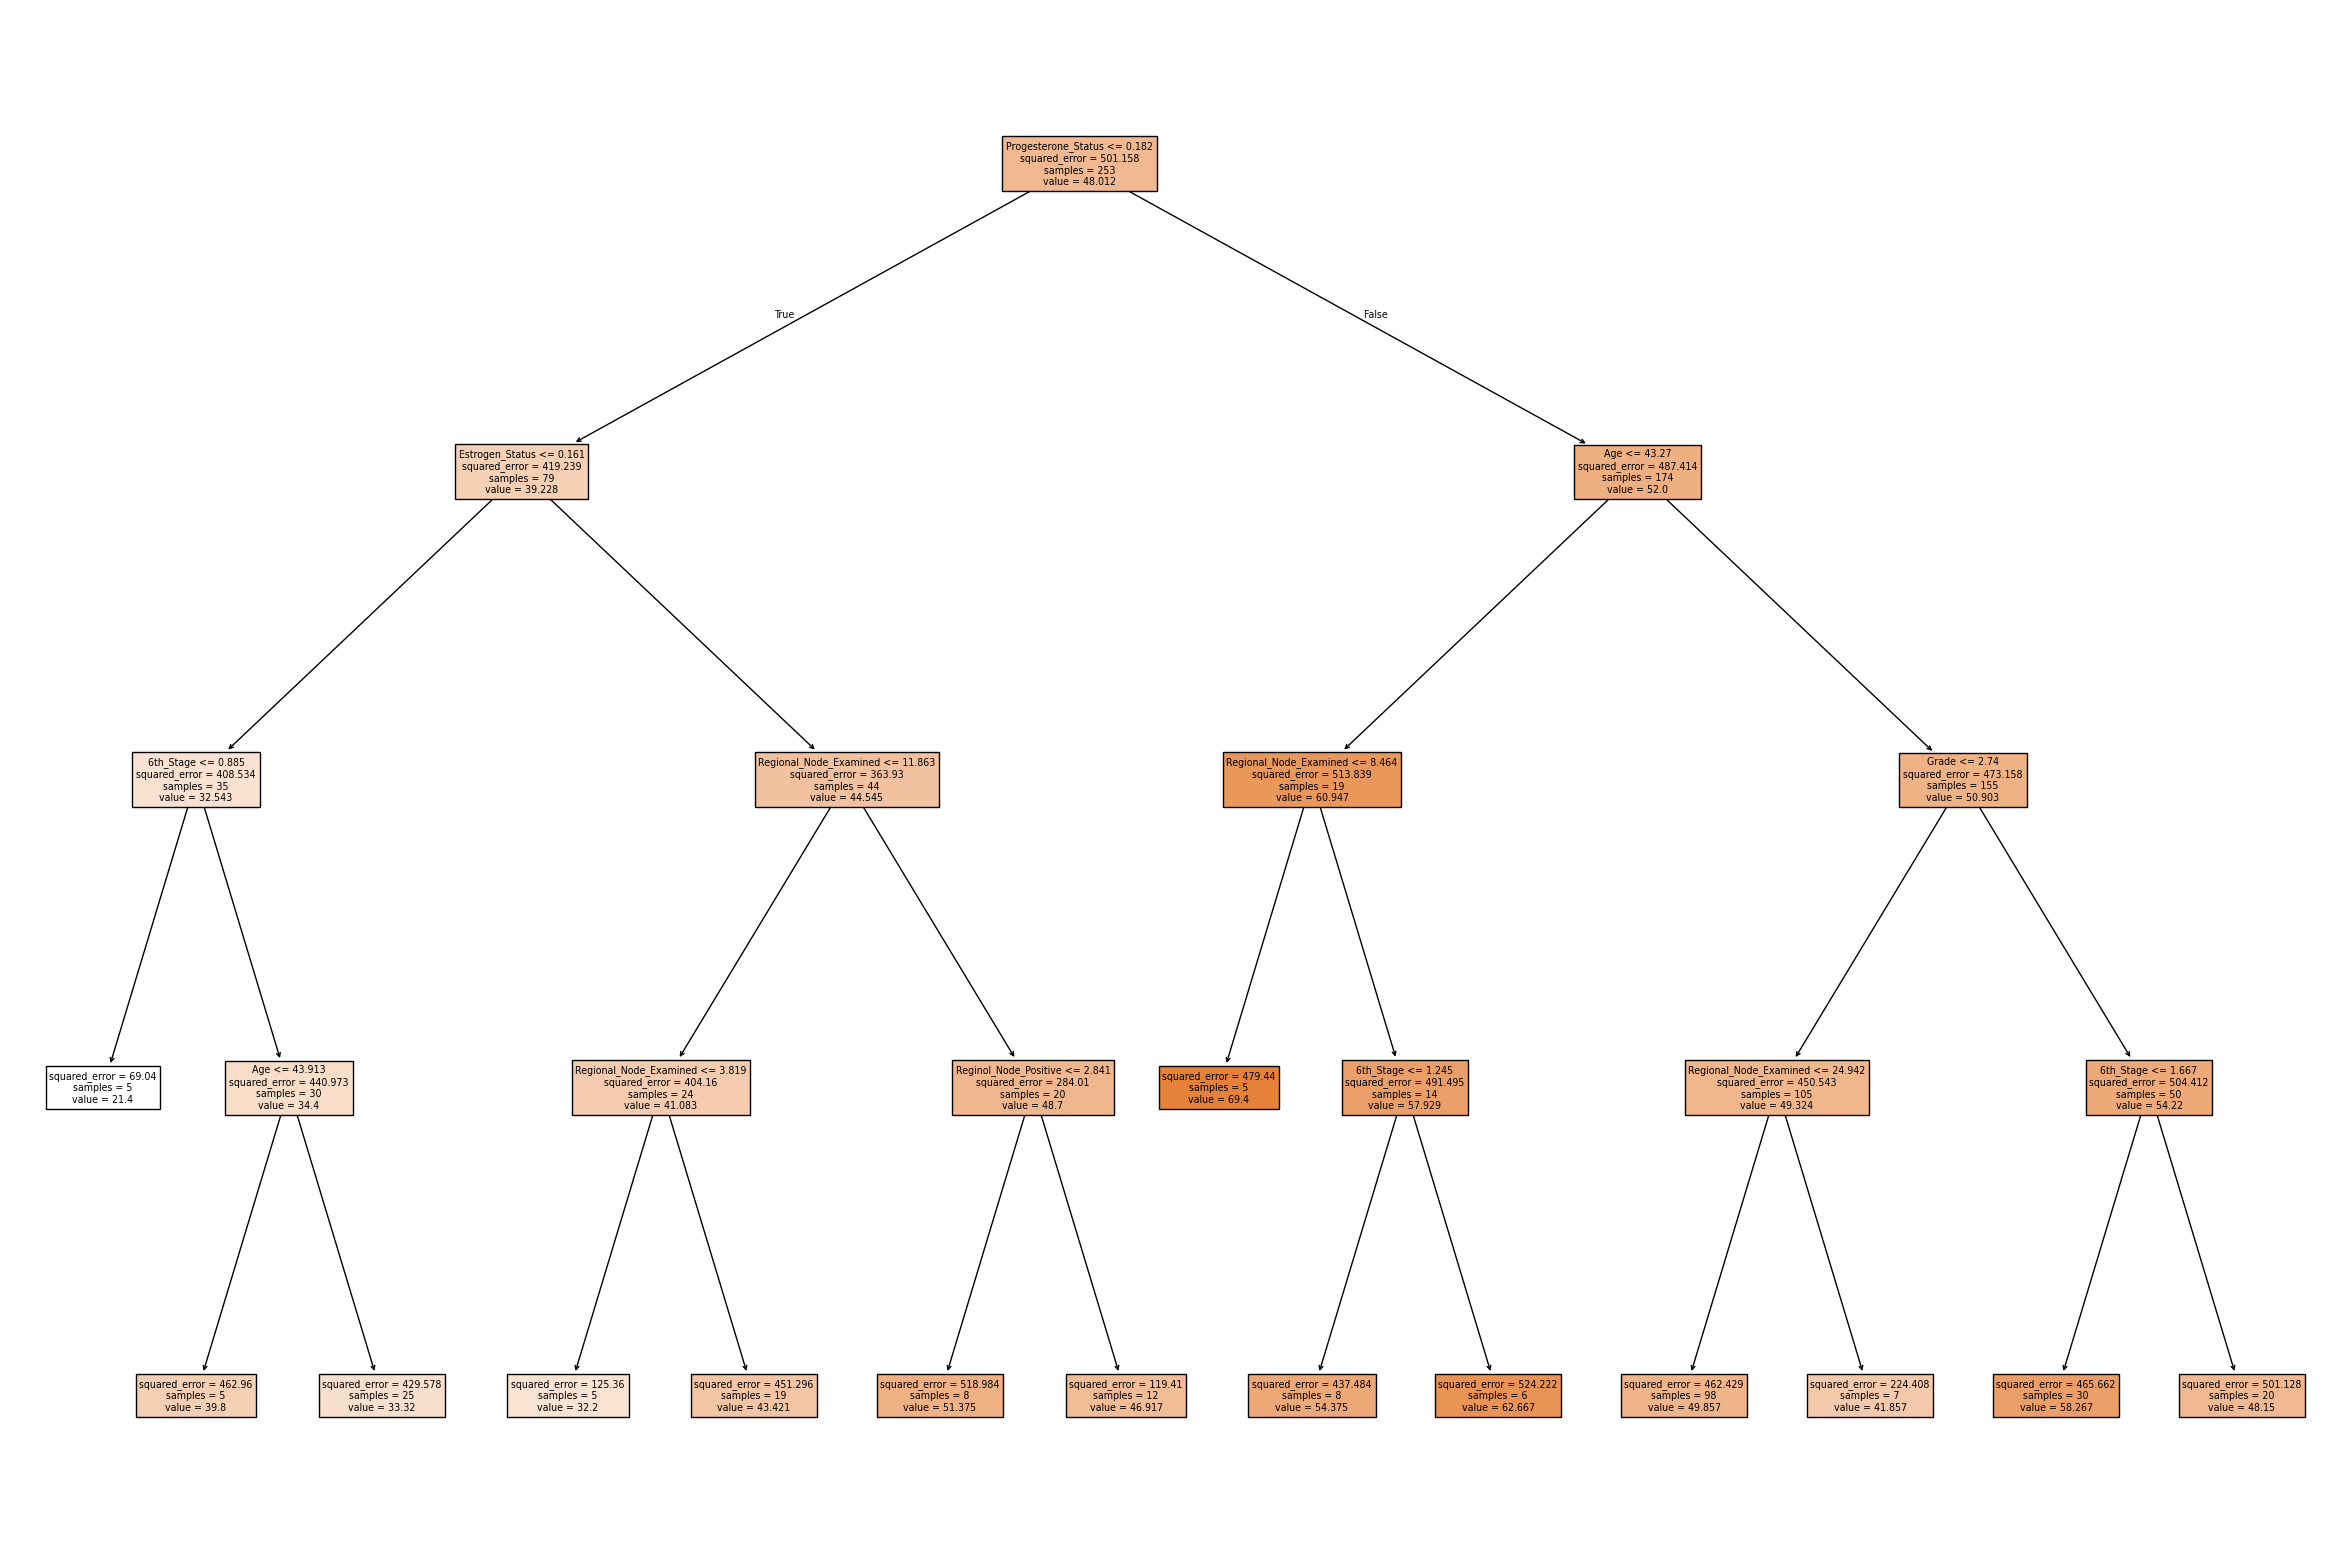

In [ ]:
best_pruned_tree = GridSerched_Pruned_Decsion_Tree.best_estimator_

Tree_figure_fullTree = plt.figure(figsize=(30,20))
DT_Graph = tree.plot_tree(best_pruned_tree, feature_names=list(X_train.columns), filled=True)

In [ ]:
Tree_figure_fullTree.savefig("/content/drive/MyDrive/ML-CW/Pruned_decistion_tree.svg")

# **Testing the Patient ID - B002565**

In [ ]:
# Making a record as Dataframe

patient_B002565 = pd.DataFrame([{
    'Age': 29,
    'Sex':0,
    'T_Stage': 2,
    'N_Stage': 0,
    '6th_Stage': 4,
    'Differentiated': 1,
    'Grade': 2,
    'A_Stage': 1,
    'Tumor_Size': 41,
    'Estrogen_Status': 0,
    'Progesterone_Status': 1,
    'Regional_Node_Examined': 5,
    'Reginol_Node_Positive': 1
}])





In [ ]:
list(patient_B002565)

['Age',
 'Sex',
 'T_Stage',
 'N_Stage',
 '6th_Stage',
 'Differentiated',
 'Grade',
 'A_Stage',
 'Tumor_Size',
 'Estrogen_Status',
 'Progesterone_Status',
 'Regional_Node_Examined',
 'Reginol_Node_Positive']

In [ ]:
# Predict on the test set
y_pred_patient_B002565 = best_pruned_tree.predict(patient_B002565)
print(y_pred_patient_B002565)


[69.4]
